#  Sales Analysis with R


Import necessary libraries


In [1]:
library(ggplot2)
library(dplyr)
library(readr) 
library(lubridate)

Warning message:
"package 'ggplot2' was built under R version 4.1.2"
Warning message:
"package 'dplyr' was built under R version 4.1.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'readr' was built under R version 4.1.2"
Warning message:
"package 'lubridate' was built under R version 4.1.2"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




Merge data from each month into one CSV

In [2]:

all_data <- list.files(path="./Sales_Data", full.names = TRUE) %>% 
  lapply(read_csv) %>% bind_rows
  



Rows: 18383 Columns: 6
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (6): Order ID, Product, Quantity Ordered, Price Each, Order Date, Purcha...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 12011 Columns: 6
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (6): Order ID, Product, Quantity Ordered, Price Each, Order Date, Purcha...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25117 Columns: 6
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (6): Order ID, Product, Quantity Ordered, Price E

In [3]:
write_csv(all_data, 'all_data.csv')

In [4]:
spec(all_data)

cols(
  `Order ID` = col_character(),
  Product = col_character(),
  `Quantity Ordered` = col_character(),
  `Price Each` = col_character(),
  `Order Date` = col_character(),
  `Purchase Address` = col_character()
)

In [5]:
spec(all_data)

cols(
  `Order ID` = col_character(),
  Product = col_character(),
  `Quantity Ordered` = col_character(),
  `Price Each` = col_character(),
  `Order Date` = col_character(),
  `Purchase Address` = col_character()
)

In [6]:
df <- read_csv(file = 'all_data.csv')

Warning message:
"One or more parsing issues, see `problems()` for details"
Rows: 186850 Columns: 6
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): Product, Order Date, Purchase Address
dbl (3): Order ID, Quantity Ordered, Price Each

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
head(df)


Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
NA,NA,NA,NA,NA,NA
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Clean up the data

In [8]:
#Find all null nan
nan_df = df[!complete.cases(df),]
head(nan_df)

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA
NA,Product,NA,NA,Order Date,Purchase Address
NA,NA,NA,NA,NA,NA
NA,Product,NA,NA,Order Date,Purchase Address
NA,Product,NA,NA,Order Date,Purchase Address


Get rid of null values


In [9]:
df = na.omit(df)
head(df)

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"


In [10]:
glimpse(df)


Rows: 185,950
Columns: 6
$ `Order ID`         <dbl> 176558, 176559, 176560, 176560, 176561, 176562, 176~
$ Product            <chr> "USB-C Charging Cable", "Bose SoundSport Headphones~
$ `Quantity Ordered` <dbl> 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ `Price Each`       <dbl> 11.95, 99.99, 600.00, 11.99, 11.99, 11.95, 99.99, 1~
$ `Order Date`       <chr> "04/19/19 08:46", "04/07/19 22:30", "04/12/19 14:38~
$ `Purchase Address` <chr> "917 1st St, Dallas, TX 75001", "682 Chestnut St, B~


In [27]:
get_city <- function(city) {
   extracted_city <- gsub(".+, (.*), .+", "\\1", city)
return   (extracted_city)
}


get_state <- function(state) {
  extracted_state_string  <- gsub(".+,.+, (.*)", "\\1", state)
   extracted_state  <-  substr( extracted_state_string, 1, 2)
    
return(extracted_state)
}
df['City'] = lapply(df['Purchase Address'], function(x) paste(get_city(x),get_state(x)))


In [12]:
dateTime = lubridate::mdy_hm(
  df$`Order Date` ,
  quiet = FALSE,
  tz = "UTC",
  locale = Sys.getlocale("LC_TIME"),
  truncated = 0
)



In [13]:
df$`Month` = month(dateTime, label = TRUE,abbr = FALSE)
head(df)

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<ord>
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April
176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",April


## Data Exploration


#### Question 1: What was the best month for sales? How much was earned that month?

In [14]:
df$`Sales` = df$`Quantity Ordered` * df$`Price Each`
head(df)
best_month_sales <- df %>% group_by(df['Month']) %>% summarize(Quantity_Ordered = sum(df$`Quantity Ordered`) , Price_Each = sum(df$`Price Each`),Sales = sum(Sales))
best_month_sales

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<ord>,<dbl>
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99
176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",April,11.95


Month,Quantity_Ordered,Price_Each,Sales
<ord>,<dbl>,<dbl>,<dbl>
January,209079,34289131,1822257
February,209079,34289131,2202022
March,209079,34289131,2807100
April,209079,34289131,3390670
May,209079,34289131,3152607
June,209079,34289131,2577802
July,209079,34289131,2647776
August,209079,34289131,2244468
September,209079,34289131,2097560


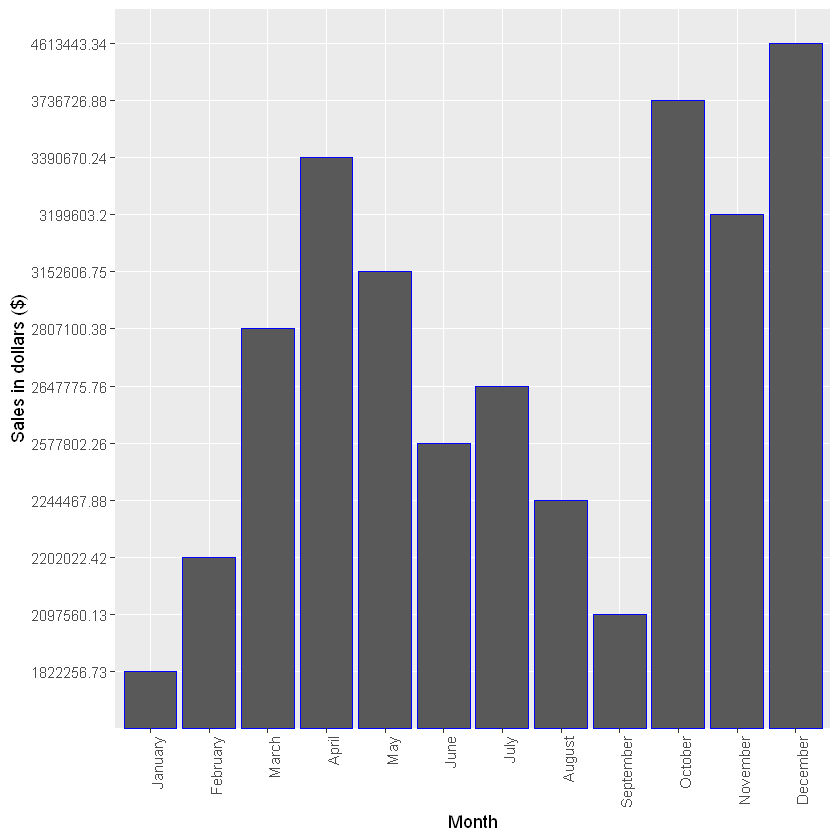

In [15]:
ggplot(best_month_sales,aes(x=Month, y=as.factor(Sales))) +
  geom_bar(stat='identity',color="blue" ) + theme(axis.text.x = element_text(angle = 90, hjust = 1))  +
  xlab("Month") + ylab("Sales in dollars ($)")

#### Question 2: What city sold the most product?

In [30]:
best_month_sales_by_city <- df %>% group_by(df['City']) %>% summarize(Quantity_Ordered = sum(df$`Quantity Ordered`) , Price_Each = sum(df$`Price Each`),Sales = sum(Sales))
best_month_sales_by_city

City,Quantity_Ordered,Price_Each,Sales
<chr>,<dbl>,<dbl>,<dbl>
Atlanta GA,209079,34289131,2795498.6
Austin TX,209079,34289131,1819581.8
Boston MA,209079,34289131,3661642.0
Dallas TX,209079,34289131,2767975.4
Los Angeles CA,209079,34289131,5452570.8
New York City NY,209079,34289131,4664317.4
Portland ME,209079,34289131,449758.3
Portland OR,209079,34289131,1870732.3
San Francisco CA,209079,34289131,8262203.9


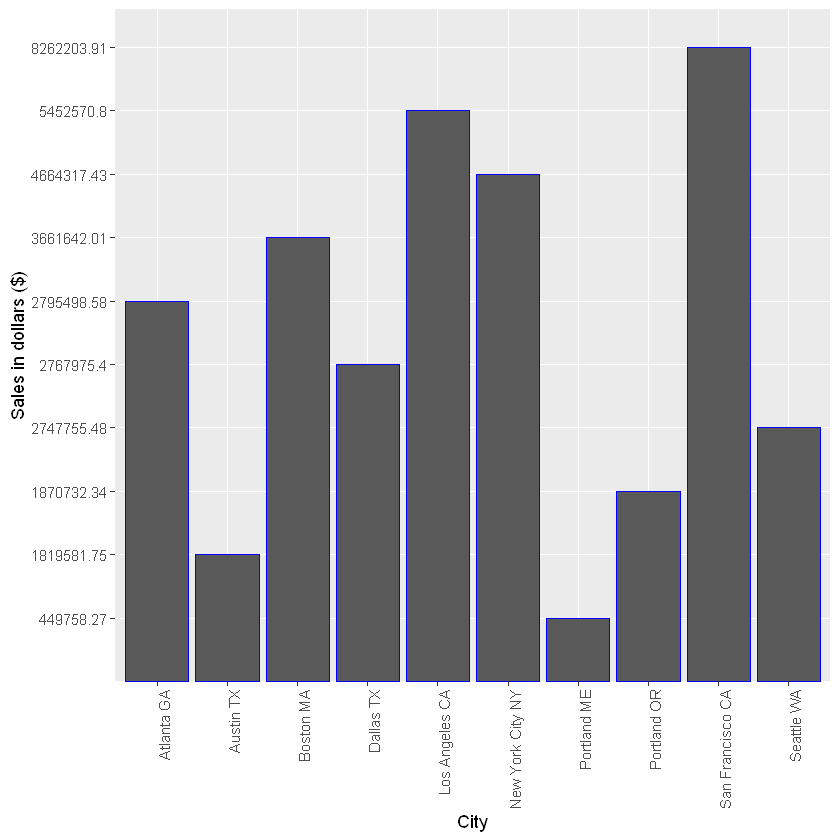

In [29]:
ggplot(best_month_sales_by_city,aes(x=City, y=as.factor(Sales))) +
  geom_bar(stat='identity',color="blue" ) + theme(axis.text.x = element_text(angle = 90, hjust = 1))  +
  xlab("City") + ylab("Sales in dollars ($)")

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [ ]:
df$`Time` = hms(df$`Order Date` ,
  quiet = FALSE,
  tz = "UTC",
  locale = Sys.getlocale("LC_TIME"),
  truncated = 0)
df$`Time`